# Surface currents from the OSCAR model 

Let's access and plot global surface currents from OSCAR: https://www.esr.org/research/oscar/oscar-surface-currents/

according to Earth and Space Research, who create this data product:

"The OSCAR product is a direct computation of global surface currents using satellite sea surface height, wind, and temperature. Currents are calculated using a quasi-steady geostrophic model together with an eddy viscosity based wind-driven ageostrophic component and a thermal wind adjustment. The model calculates a surface current averaged over the top 30m of the upper ocean."


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

/Users/beaird/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/beaird/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# where is the data? 

ESR points you at the NASA Physical Oceanography Data Center, PO.DAAC to get the data. There is a ton of good data availabe there. 

We can get the OSCAR currents via the opendap protocal at with a link like the one below for 2019 (change for your desired year):
```python
url = 'https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/oscar/preview/L4/oscar_third_deg/oscar_vel2019.nc.gz'
```


In [2]:
url = 'https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/oscar/preview/L4/oscar_third_deg/oscar_vel2019.nc.gz'


ds = xr.open_dataset(url)

ds


<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 481, longitude: 1201, time: 43, year: 43)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-01 2019-01-06 ... 2019-08-01
  * year       (year) float32 2019.0 2019.0139 2019.0278 ... 2019.5695 2019.5834
  * depth      (depth) float32 15.0
  * latitude   (latitude) float64 80.0 79.67 79.33 79.0 ... -79.33 -79.67 -80.0
  * longitude  (longitude) float64 20.0 20.33 20.67 21.0 ... 419.3 419.7 420.0
Data variables:
    u          (time, depth, latitude, longitude) float64 ...
    v          (time, depth, latitude, longitude) float64 ...
    um         (time, depth, latitude, longitude) float64 ...
    vm         (time, depth, latitude, longitude) float64 ...
Attributes:
    VARIABLE:       Ocean Surface Currents
    DATATYPE:       1/72 YEAR Interval
    DATASUBTYPE:    unfiltered
    GEORANGE:       20 to 420 -80 to 80
    PERIOD:         Jan.01,2019 to Aug.01,2019
    year:           2019
    description:    OSCAR Third Degree Se

# plot global surface U (zonal speed)

on a particular day: 2019-01-01

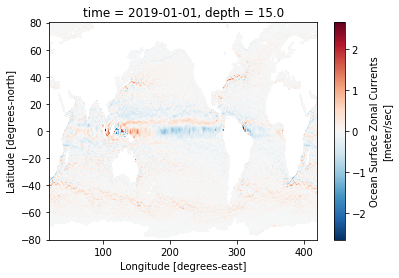

In [3]:
ds.u.sel(time='2019-01-01', method='nearest').plot()

# just look at the western north atlantic:

select only lon = 275:350, lat = 60:20

remember to use `.sel( dim = slice(start, stop)`


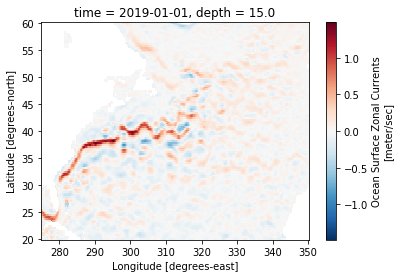

In [4]:
ds.u.sel(time='2019-01-01', longitude=slice(275, 350), latitude=slice(60, 20)).plot()

grab just a subset of the data

In [5]:
subset = ds.sel(time='2019-01-01', longitude=slice(275, 350), latitude=slice(60, 20))

subset

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 121, longitude: 226, year: 43)
Coordinates:
    time       datetime64[ns] 2019-01-01
  * year       (year) float32 2019.0 2019.0139 2019.0278 ... 2019.5695 2019.5834
  * depth      (depth) float32 15.0
  * latitude   (latitude) float64 60.0 59.67 59.33 59.0 ... 20.67 20.33 20.0
  * longitude  (longitude) float64 275.0 275.3 275.7 276.0 ... 349.3 349.7 350.0
Data variables:
    u          (depth, latitude, longitude) float64 ...
    v          (depth, latitude, longitude) float64 ...
    um         (depth, latitude, longitude) float64 ...
    vm         (depth, latitude, longitude) float64 ...
Attributes:
    VARIABLE:       Ocean Surface Currents
    DATATYPE:       1/72 YEAR Interval
    DATASUBTYPE:    unfiltered
    GEORANGE:       20 to 420 -80 to 80
    PERIOD:         Jan.01,2019 to Aug.01,2019
    year:           2019
    description:    OSCAR Third Degree Sea Surface Velocity
    CREATION_DATE:  02:49 01-Aug-2019
    version:

# plot the vectors

we can use a matplotlib function called `plt.quiver()` to plot vectors. It takes as arguments the x, y locations, and the u, and v components of the velocity: `plt.quiver(x, y, u, v)`

this is annoying, but the velocity components in our data have 3 dims: depth, latitude, and longitude, and quiver can only handle 2D data, so we need to select a dimention using the `numpy` style selections. In our case the u and v data we want for plotting can be gotten with `subset.u[0,:,:]` and `subset.v[0,:,:]`

try filling in the blanks to make a quiverplot:

```python
plt.quiver(subset.___ , subset.___ , subset.___[0,:,:], subset.v[0,:,:])

```



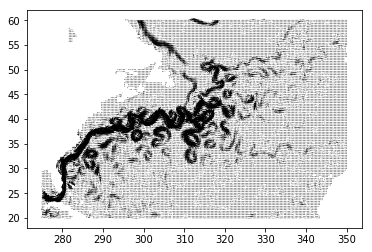

In [4]:
plt.quiver(subset.longitude, subset.latitude, subset.u[0,:,:], subset.v[0,:,:])

# subset.v[0,:,:]

after you make the full map, try making a zoomed in version using `plt.xlim()` and `plt.ylim()`

(25, 45)

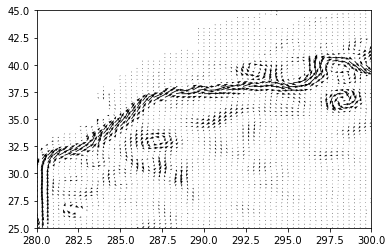

In [17]:
plt.quiver(subset.longitude, subset.latitude, subset.u[0,:,:], subset.v[0,:,:])
plt.xlim([280, 300])
plt.ylim([25, 45])

/Users/beaird/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/beaird/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


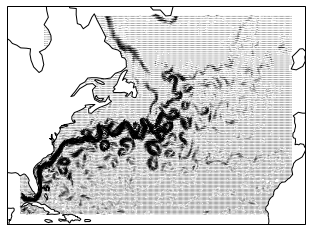

In [6]:
import cartopy

plt.figure()
ax = plt.axes( projection = cartopy.crs.Mercator())
ax.coastlines()

plt.quiver(subset.longitude.values, subset.latitude.values, subset.u[0,:,:].values, subset.v[0,:,:].values, transform=cartopy.crs.PlateCarree())
